<a href="https://colab.research.google.com/github/tsycstang/china_hdi_2016/blob/master/Geo_Analysis_China.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q geopandas

     |████████████████████████████████| 931kB 2.7MB/s 
     |████████████████████████████████| 10.9MB 13.0MB/s 
     |████████████████████████████████| 14.7MB 254kB/s 


In [2]:
!git clone https://github.com/tsycstang/china_geojson

Cloning into 'china_geojson'...
remote: Enumerating objects: 423, done.
remote: Counting objects: 100% (423/423), done.
remote: Compressing objects: 100% (416/416), done.
remote: Total 423 (delta 8), reused 421 (delta 6), pack-reused 0
Receiving objects: 100% (423/423), 50.03 MiB | 20.78 MiB/s, done.
Resolving deltas: 100% (8/8), done.
Checking out files: 100% (416/416), done.


In [0]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
china_prov = gpd.read_file('/content/china_geojson/China_provincial.geojson').astype({'code': str})

In [0]:
region_dict = {'1': 'HuaBei',
               '2': 'DongBei',
               '3': 'HuaDong',
               '4': 'ZhongNan',
               '5': 'XiNan',
               '6': 'XiBei',
               '7': 'TaiWan',
               '8': 'GangAo'}
region_list = []

for i in range(len(china_prov)):
    code = china_prov.loc[i, 'code']
    region_list.append(region_dict[code[0]])

china_prov['region'] = region_list
china_prov = china_prov.astype({'region': 'category'})

In [6]:
china_prov.head()

,code,name,geometry,region
0,440000,广东省,"MULTIPOLYGON (((117.28794 23.25320, 117.28685 ...",ZhongNan
1,410000,河南省,"MULTIPOLYGON (((111.02097 33.47121, 111.02065 ...",ZhongNan
2,230000,黑龙江省,"MULTIPOLYGON (((124.14303 50.56614, 124.15190 ...",DongBei
3,650000,新疆维吾尔自治区,"POLYGON ((86.74150 48.92107, 86.74087 48.92180...",XiBei
4,420000,湖北省,"MULTIPOLYGON (((111.04675 33.20293, 111.05143 ...",ZhongNan


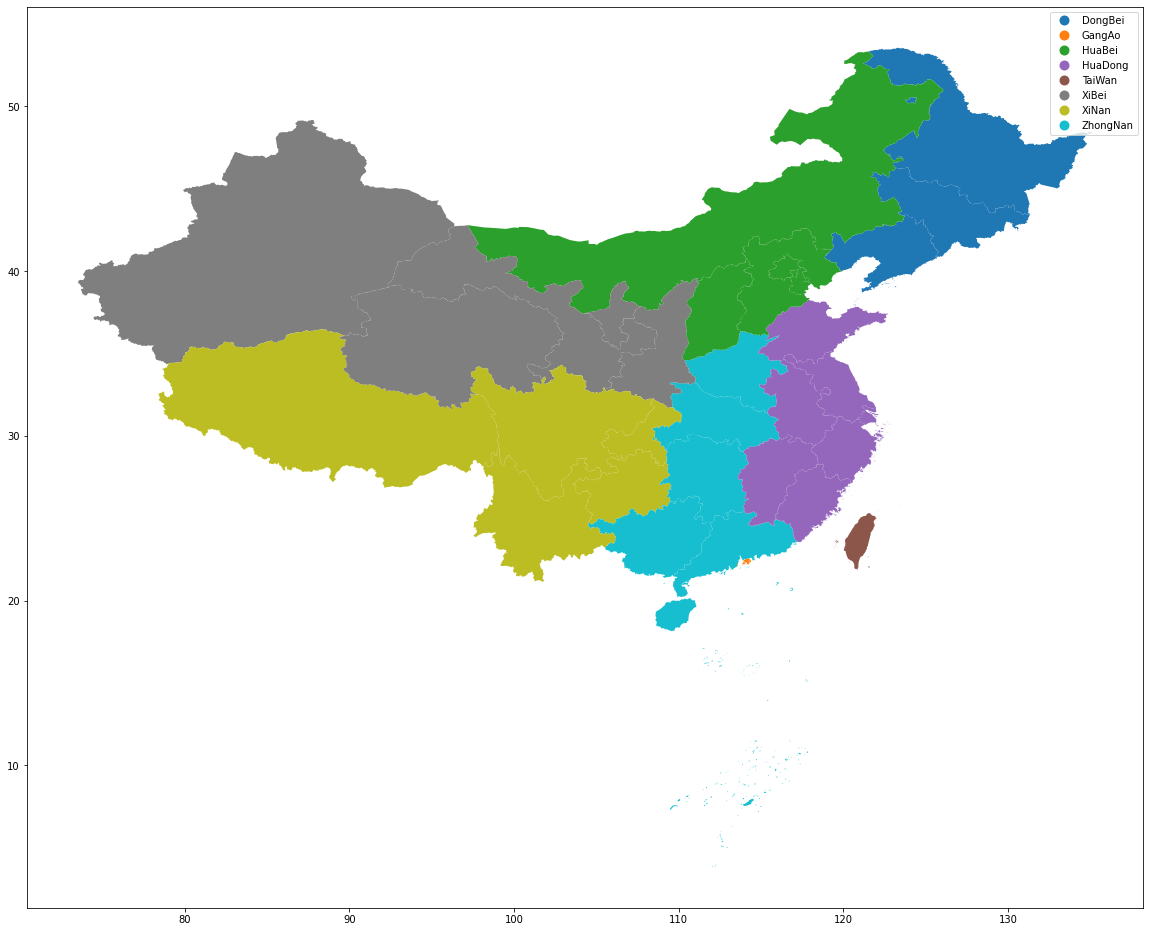

In [7]:
china_prov.plot('region', figsize=(20, 20), legend=True)

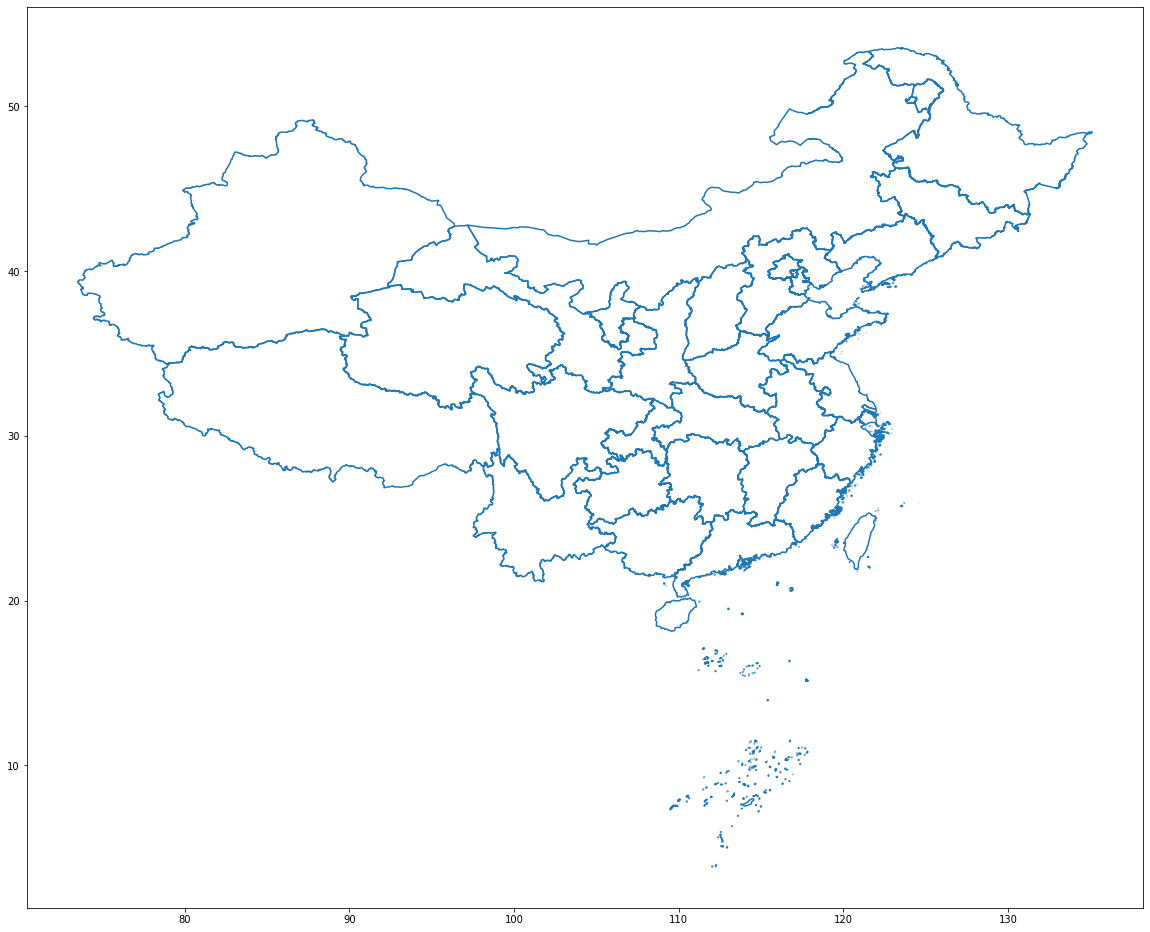

In [8]:
china_prov.boundary.plot(figsize=(20, 20))

In [0]:
province_rule = ['Anhui', 'Beijing_overall', 'Chongqing_overall', 'Fujian',
                 'Gansu', 'Guangdong', 'Guangxi', 'Guizhou', 'Hainan','Hebei', 
                 'Heilongjiang', 'Henan', 'HongKongSAR', 'Hubei', 'Hunan', 
                 'InnerMongol', 'Jiangsu', 'Jiangxi', 'Jilin', 'Liaoning', 
                 'MacauSAR', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong', 
                 'Shanghai_overall', 'Shanxi', 'Sichuan', 'Tianjin_overall', 
                 'Tibet', 'Xinjiang', 'Yunnan', 'Zhejiang']

china_plot = gpd.read_file('/content/china_geojson/Provinces/Taiwan.geojson')
for province in province_rule:
    json_path = '/content/china_geojson/Provinces/' + province + '.geojson'
    china_plot = pd.concat([china_plot, gpd.read_file(json_path)]).reset_index(drop=True)

In [10]:
china_plot.head()

,code,name,geometry
0,710000,台湾省,"MULTIPOLYGON (((119.55430 23.68248, 119.55499 ..."
1,340600,淮北市,"MULTIPOLYGON (((117.03154 34.16670, 117.03168 ..."
2,341200,阜阳市,"MULTIPOLYGON (((114.89730 33.08659, 114.89694 ..."
3,340700,铜陵市,"MULTIPOLYGON (((116.96071 30.62856, 116.95715 ..."
4,341000,黄山市,"POLYGON ((118.86886 30.10146, 118.87197 30.096..."


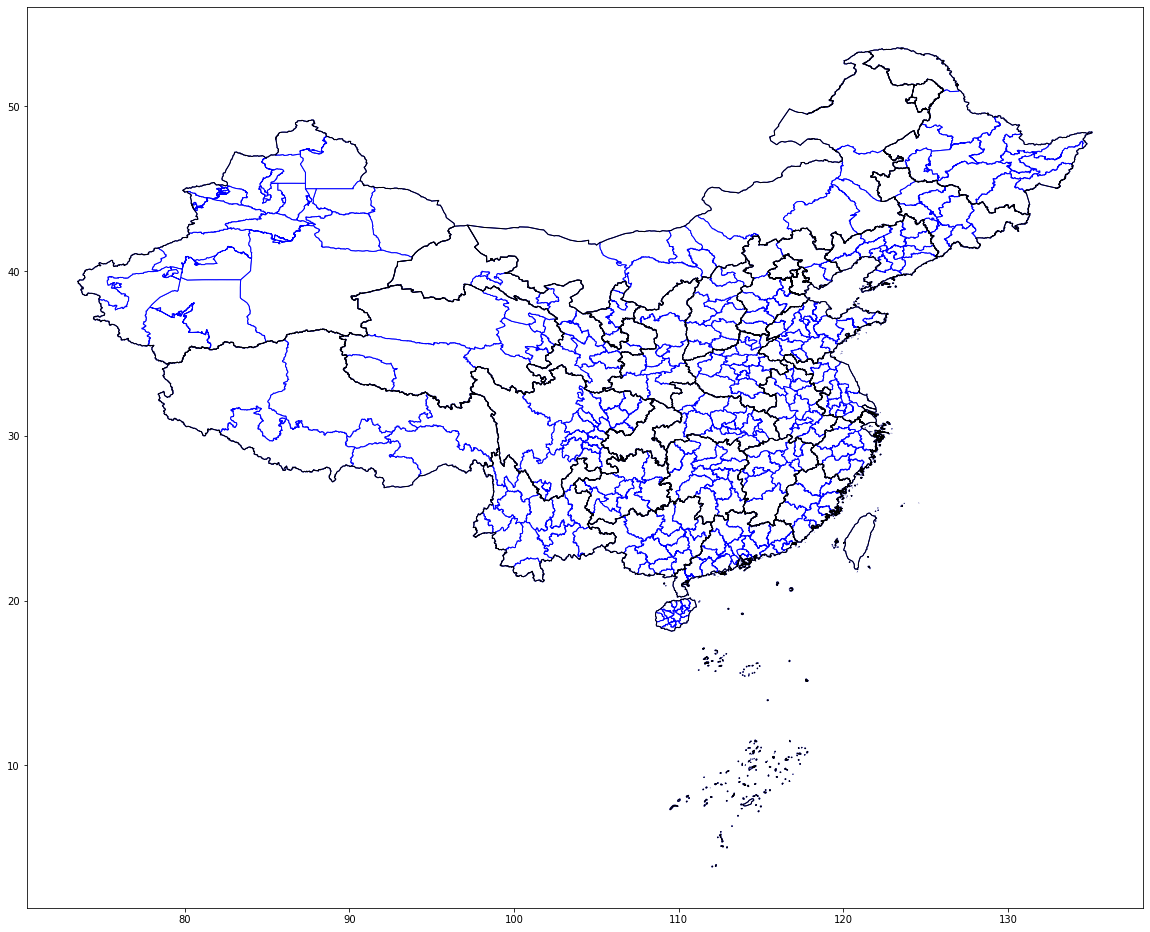

In [11]:
base = china_plot.plot(facecolor='white', edgecolor='blue', figsize=(20, 20))
china_prov.plot(ax=base, facecolor='none', edgecolor='black')

In [12]:
!git clone https://github.com/tsycstang/china_hdi_2016

Cloning into 'china_hdi_2016'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 13 (delta 2), reused 13 (delta 2), pack-reused 0
Unpacking objects: 100% (13/13), done.


In [0]:
china_data = pd.read_csv('/content/china_hdi_2016/china_hdi_data.csv')

In [0]:
china_data = china_data.astype({'code': str})

In [0]:
china_plot = china_plot.merge(china_data, on='code')

In [16]:
china_plot

,code,name,geometry,province name,prefecture name,hdi
0,340600,淮北市,"MULTIPOLYGON (((117.03154 34.16670, 117.03168 ...",安徽省,淮北市,0.738
1,341200,阜阳市,"MULTIPOLYGON (((114.89730 33.08659, 114.89694 ...",安徽省,阜阳市,0.675
2,340700,铜陵市,"MULTIPOLYGON (((116.96071 30.62856, 116.95715 ...",安徽省,铜陵市,0.752
3,341000,黄山市,"POLYGON ((118.86886 30.10146, 118.87197 30.096...",安徽省,黄山市,0.735
4,340800,安庆市,"MULTIPOLYGON (((116.90333 30.35727, 116.91034 ...",安徽省,安庆市,0.722
...,...,...,...,...,...,...
332,330500,湖州市,"POLYGON ((119.92001 31.17092, 119.92049 31.170...",浙江省,湖州市,0.782
333,330700,金华市,"POLYGON ((119.32242 28.80091, 119.32239 28.801...",浙江省,金华市,0.771
334,330800,衢州市,"POLYGON ((119.32251 28.80507, 119.32259 28.803...",浙江省,衢州市,0.761
335,330100,杭州市,"POLYGON ((118.34497 29.47570, 118.34619 29.474...",浙江省,杭州市,0.808


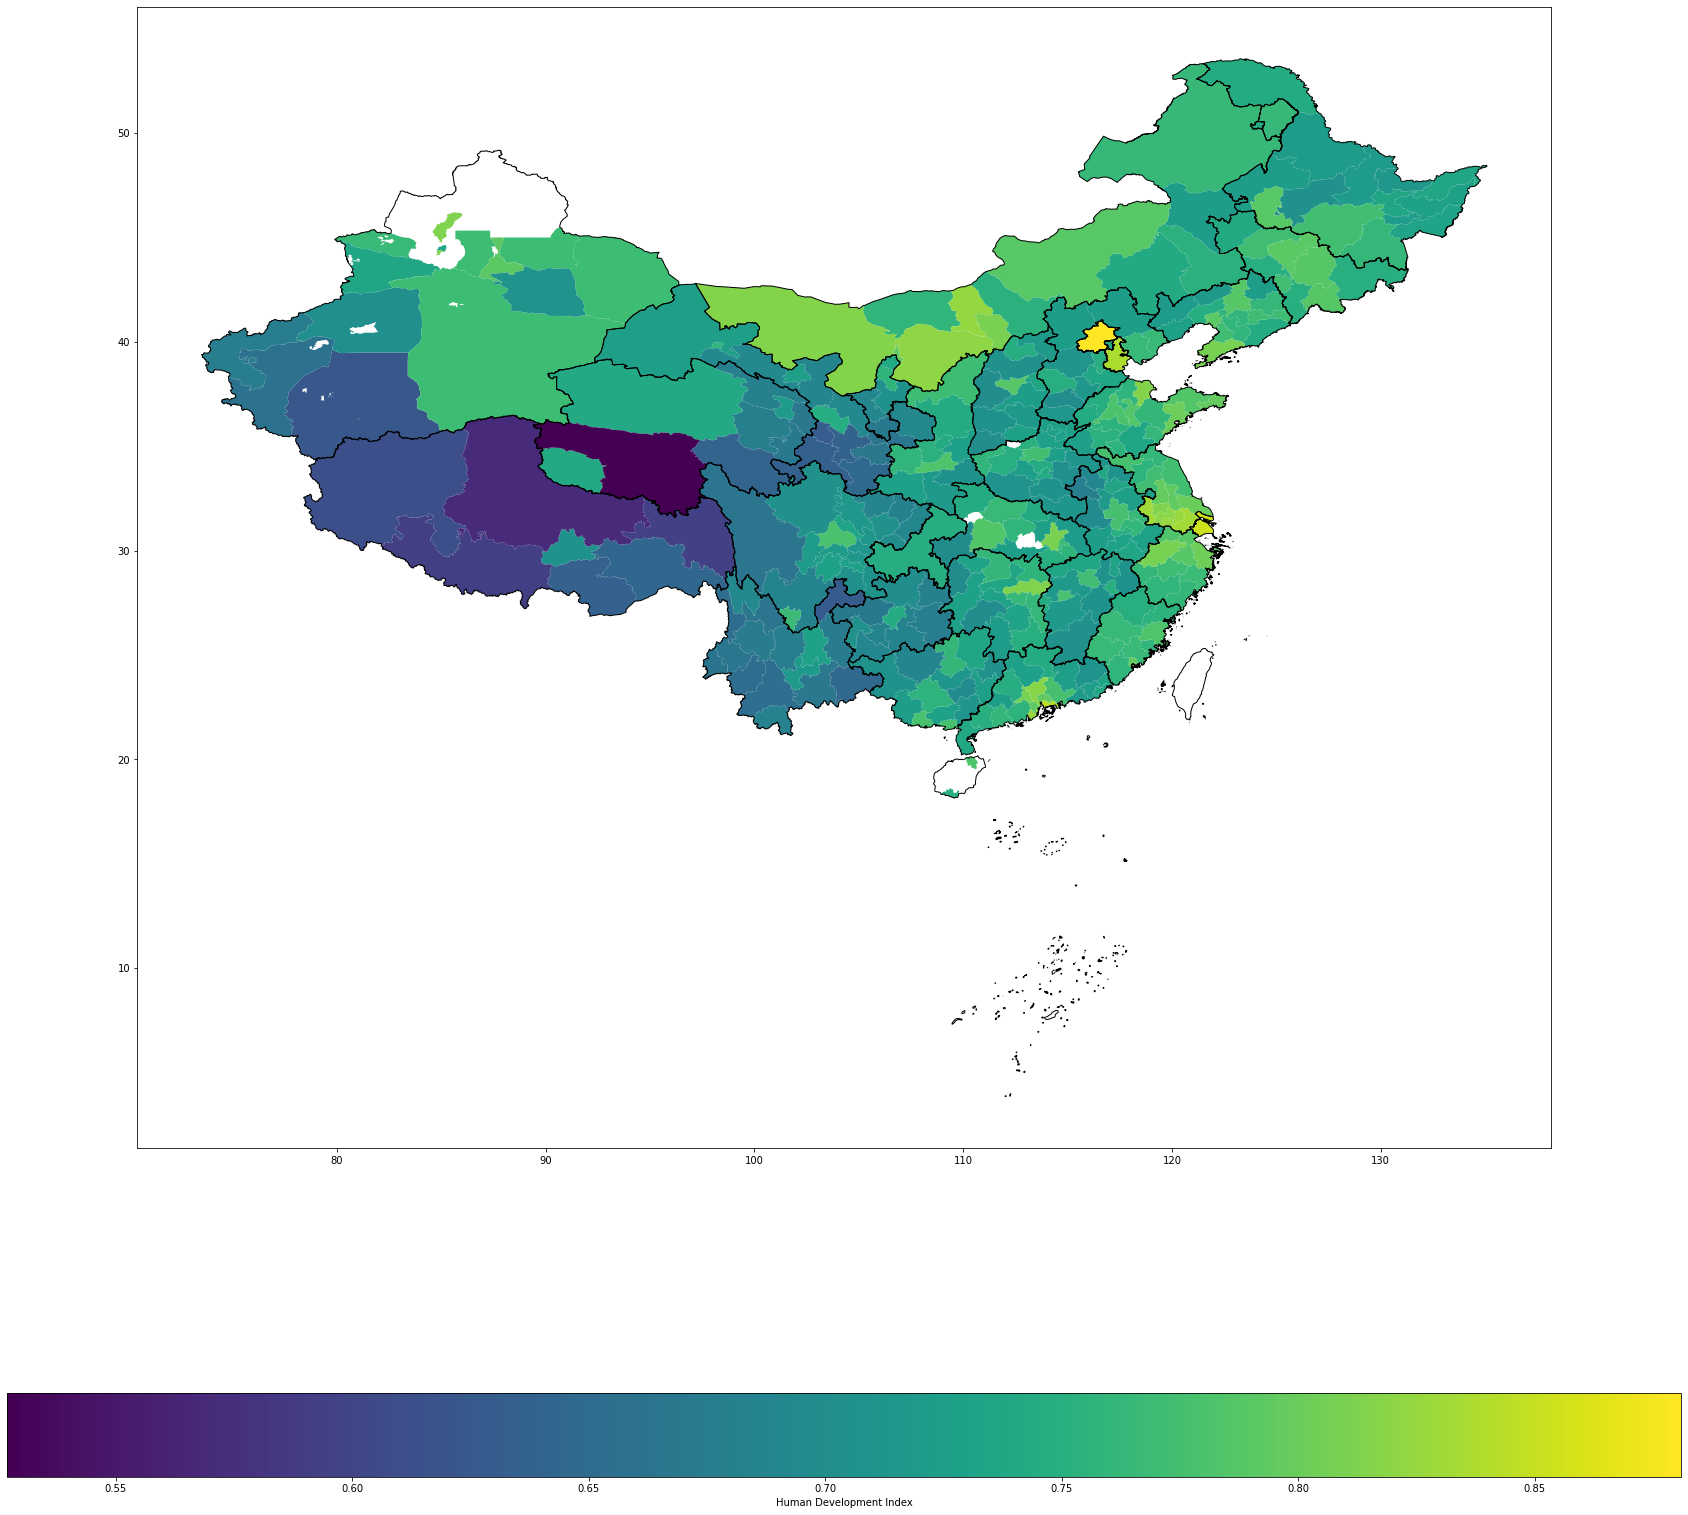

In [17]:
based = china_plot.plot('hdi', figsize=(30, 30), legend=True, 
                        legend_kwds={'label': "Human Development Index", 
                                     'orientation': "horizontal"},
                        )
china_prov.plot(ax=based, facecolor='none', edgecolor='black')

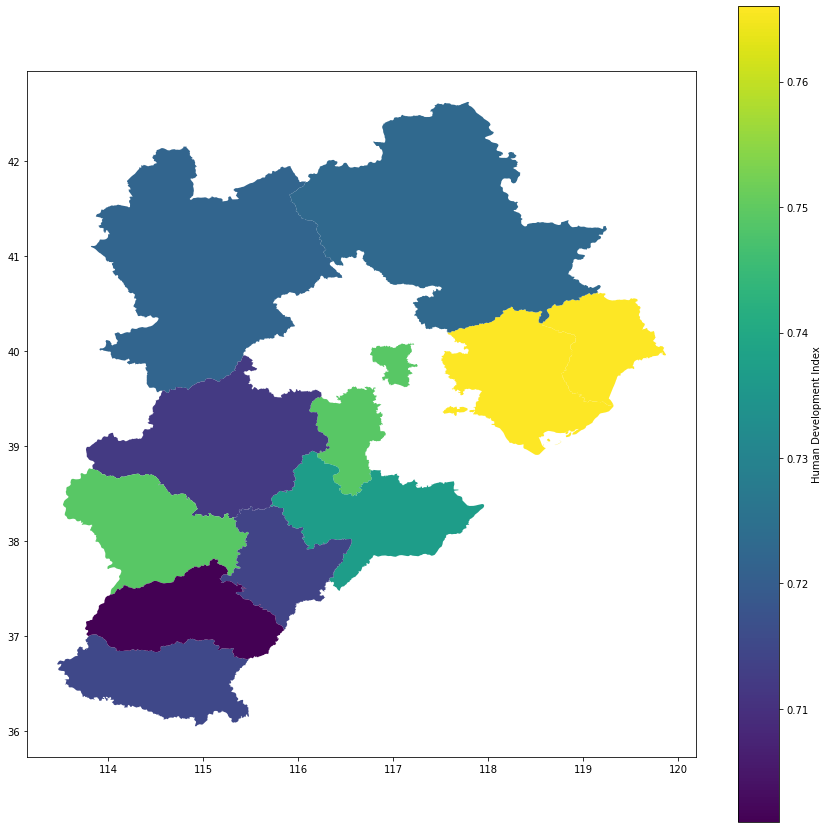

In [18]:
china_plot[china_plot['province name']=='河北省'].plot('hdi', legend=True, figsize=(15, 15), legend_kwds={'label': "Human Development Index"})

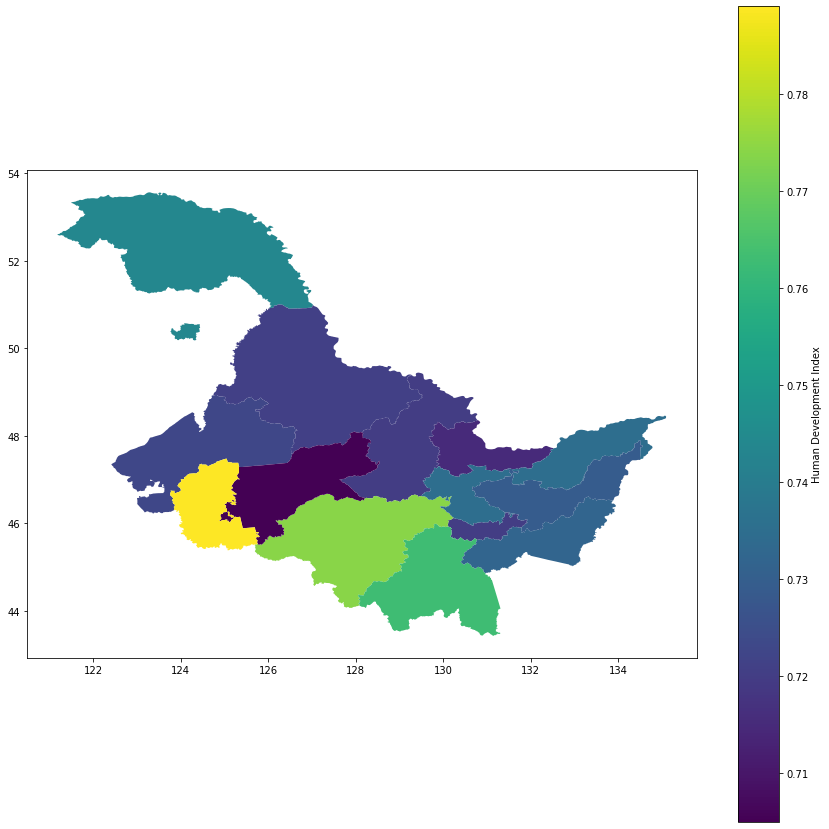

In [19]:
china_plot[china_plot['province name']=='黑龙江省'].plot('hdi', legend=True, figsize=(15, 15), legend_kwds={'label': "Human Development Index"})

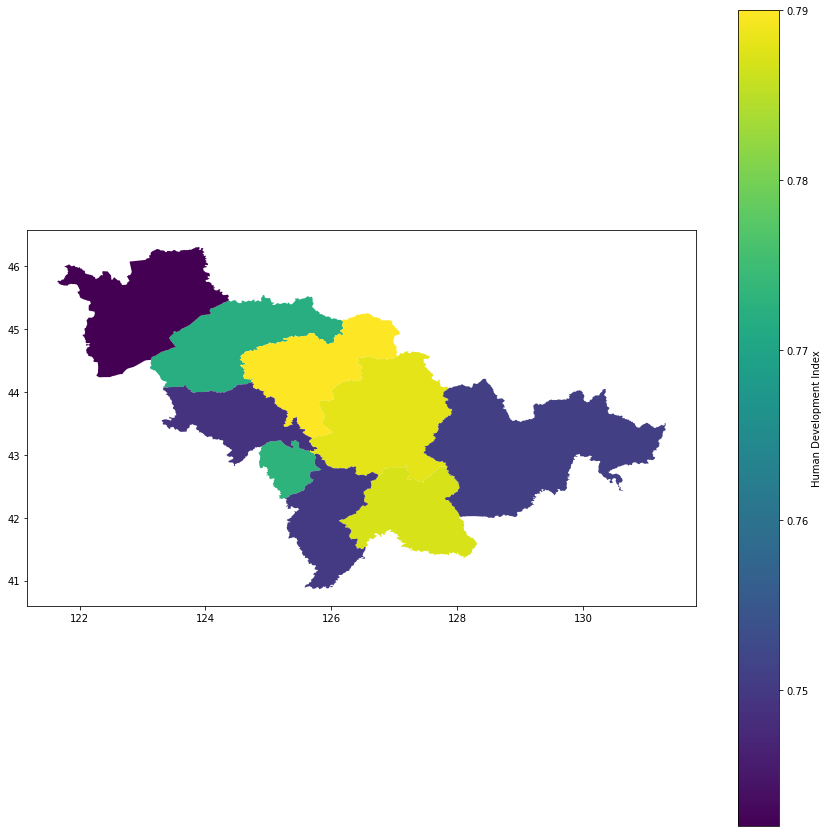

In [20]:
china_plot[china_plot['province name']=='吉林省'].plot('hdi', legend=True, figsize=(15, 15), legend_kwds={'label': "Human Development Index"})

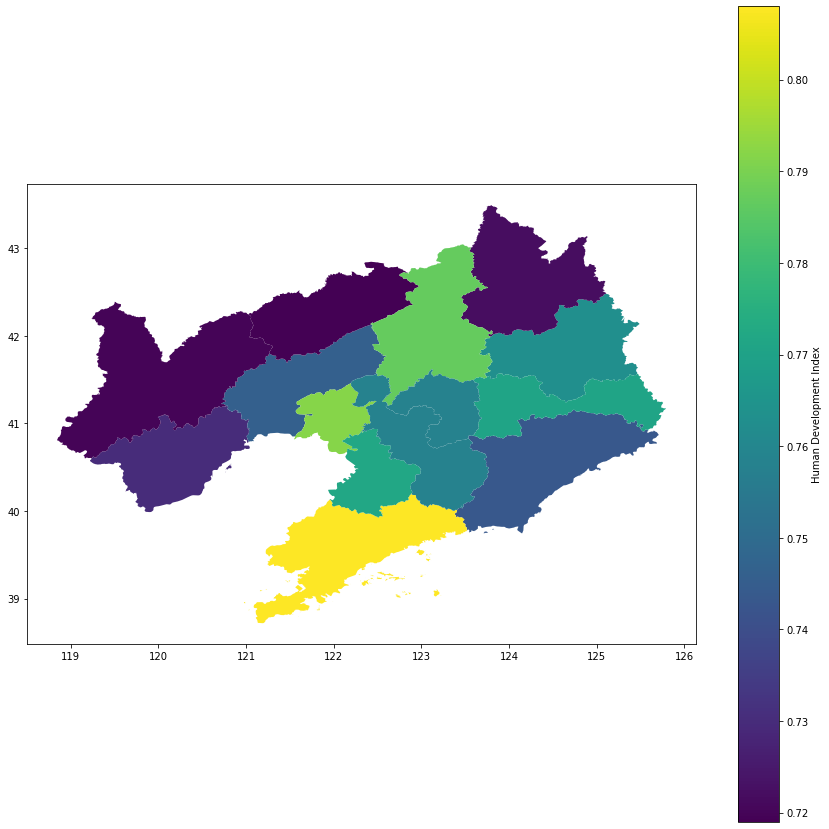

In [21]:
china_plot[china_plot['province name']=='辽宁省'].plot('hdi', legend=True, figsize=(15, 15), legend_kwds={'label': "Human Development Index"})

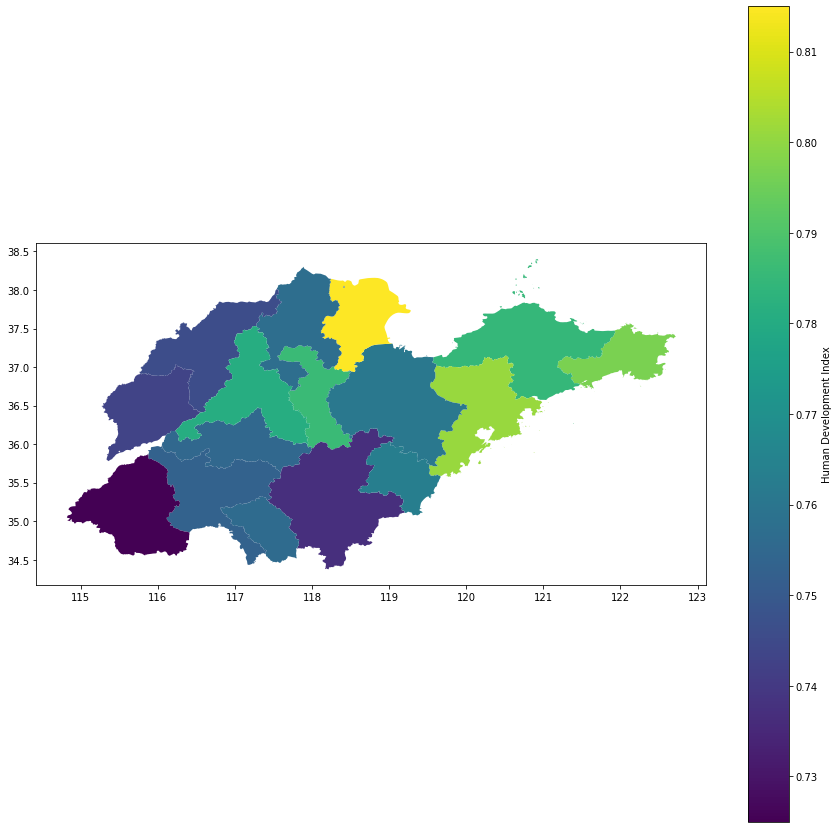

In [22]:
china_plot[china_plot['province name']=='山东省'].plot('hdi', legend=True, figsize=(15, 15), legend_kwds={'label': "Human Development Index"})

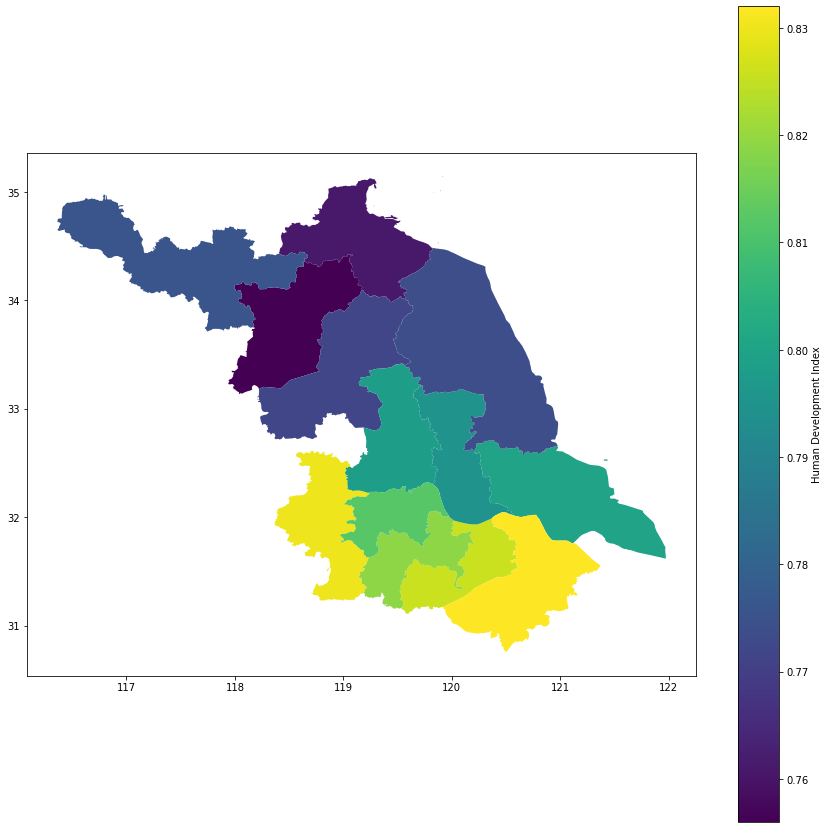

In [23]:
china_plot[china_plot['province name']=='江苏省'].plot('hdi', legend=True, figsize=(15, 15), legend_kwds={'label': "Human Development Index"})

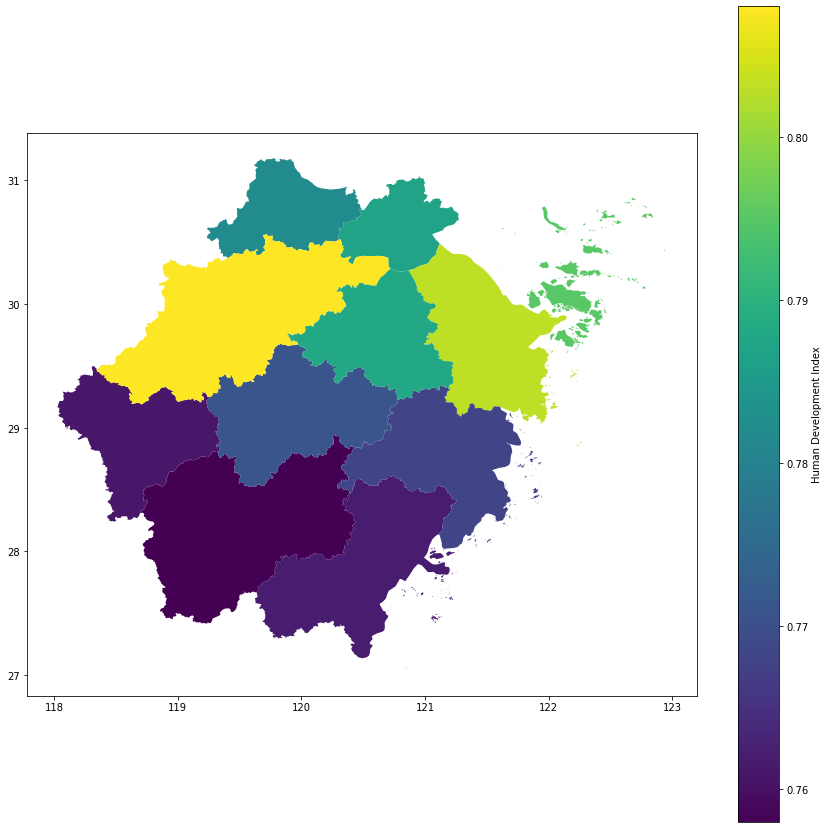

In [24]:
china_plot[china_plot['province name']=='浙江省'].plot('hdi', legend=True, figsize=(15, 15), legend_kwds={'label': "Human Development Index"})

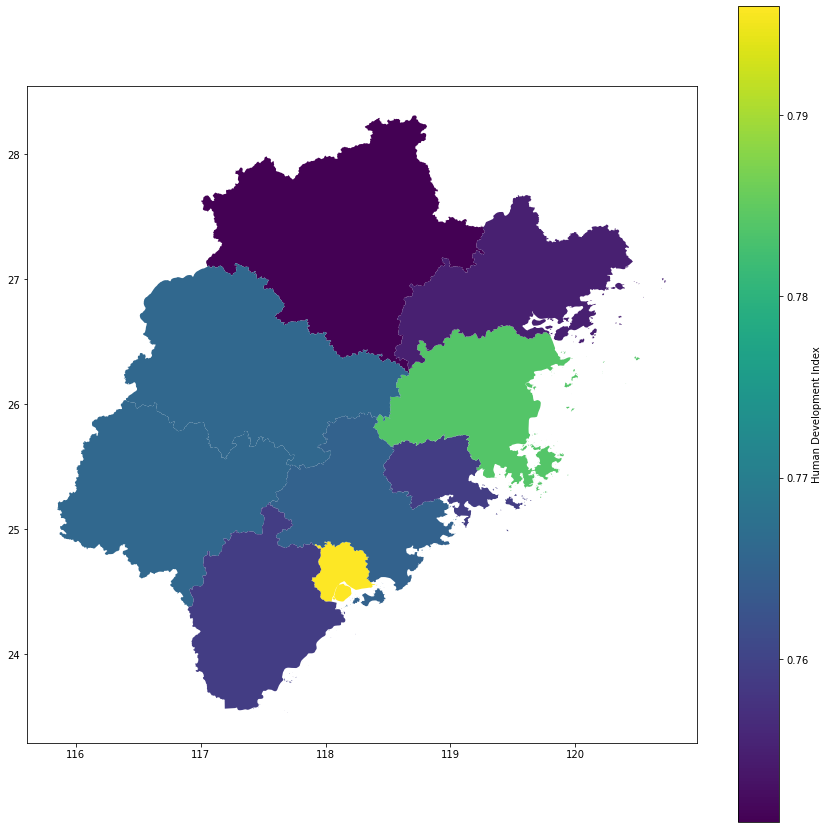

In [25]:
china_plot[china_plot['province name']=='福建省'].plot('hdi', legend=True, figsize=(15, 15), legend_kwds={'label': "Human Development Index"})

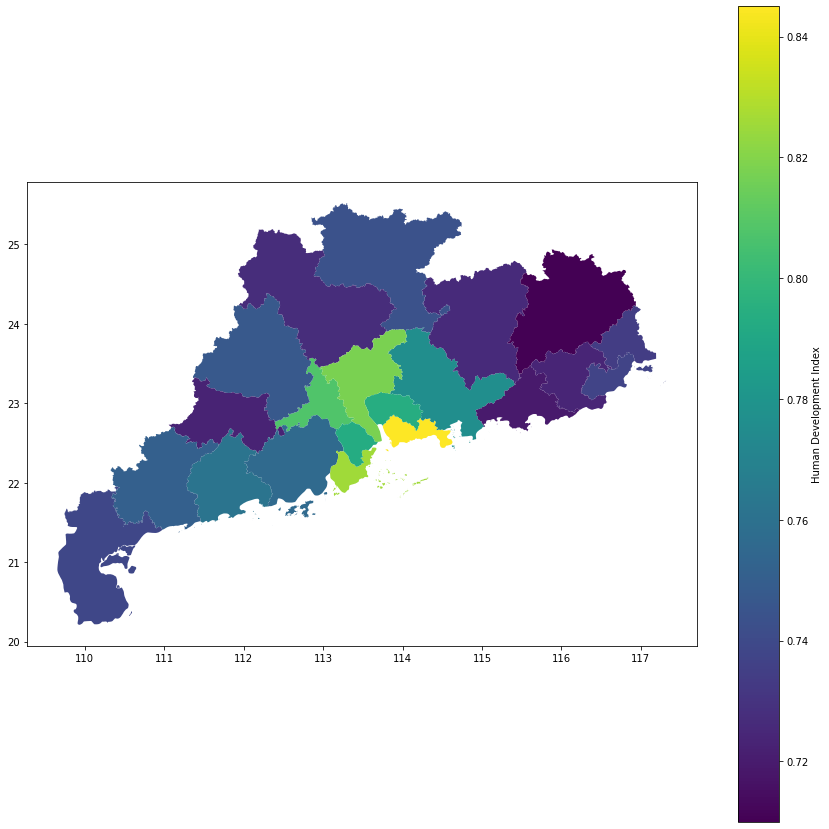

In [26]:
china_plot[china_plot['province name']=='广东省'].plot('hdi', legend=True, figsize=(15, 15), legend_kwds={'label': "Human Development Index"})

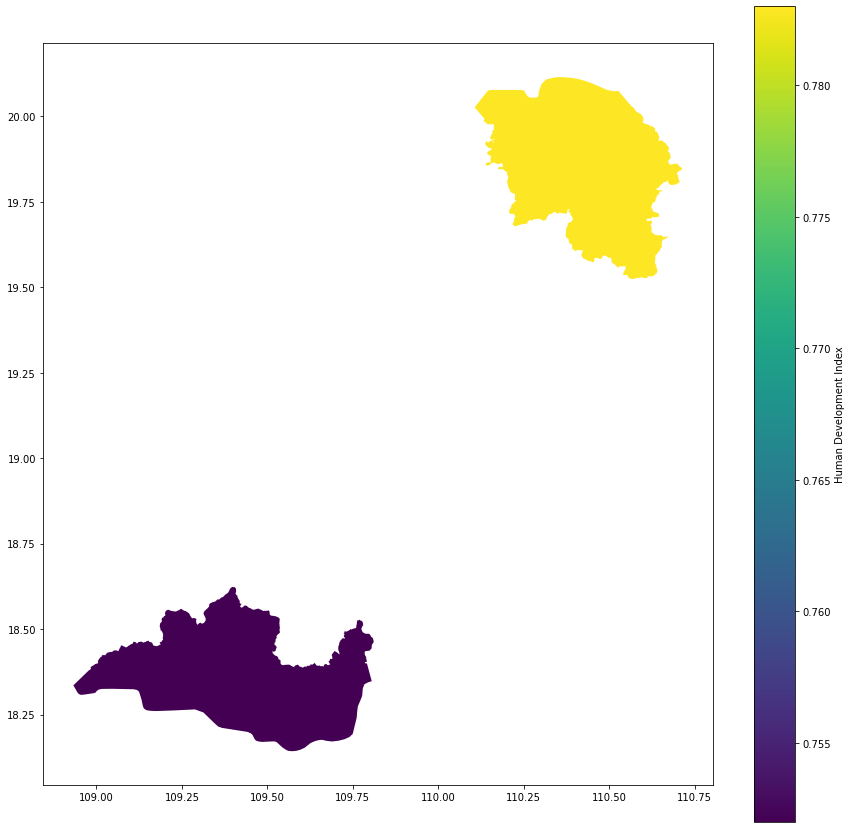

In [27]:
china_plot[china_plot['province name']=='海南省'].plot('hdi', legend=True, figsize=(15, 15), legend_kwds={'label': "Human Development Index"})

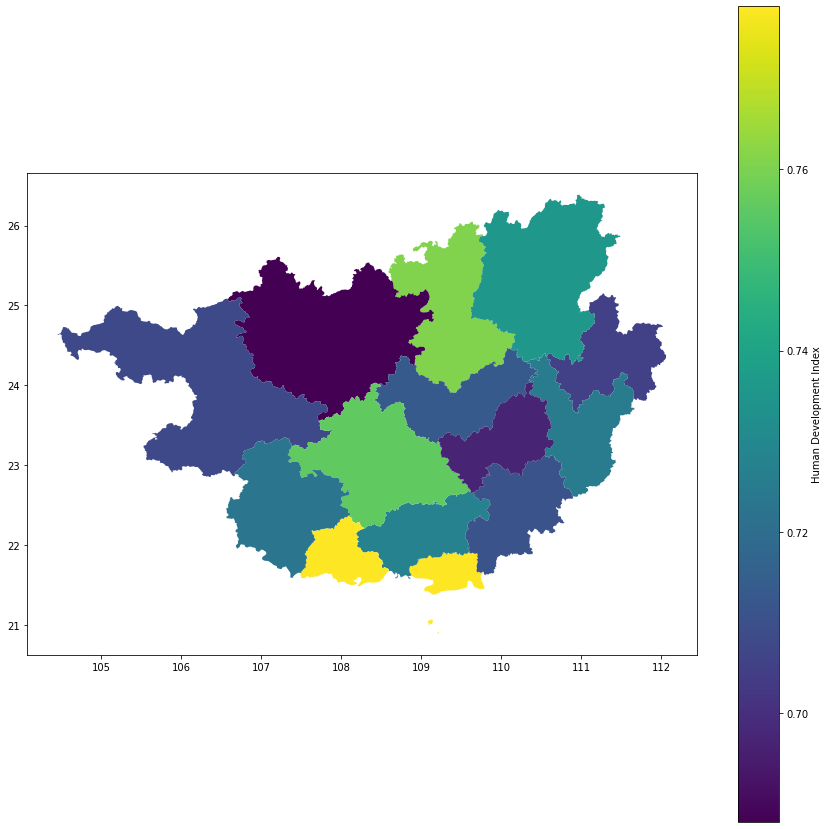

In [28]:
china_plot[china_plot['province name']=='广西壮族自治区'].plot('hdi', legend=True, figsize=(15, 15), legend_kwds={'label': "Human Development Index"})

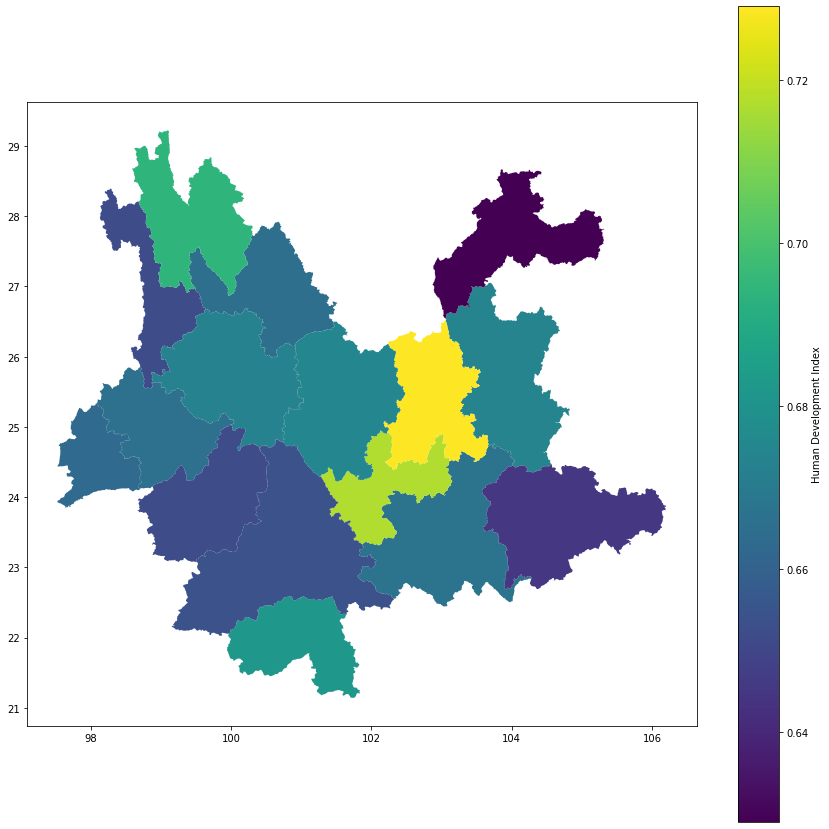

In [29]:
china_plot[china_plot['province name']=='云南省'].plot('hdi', legend=True, figsize=(15, 15), legend_kwds={'label': "Human Development Index"})

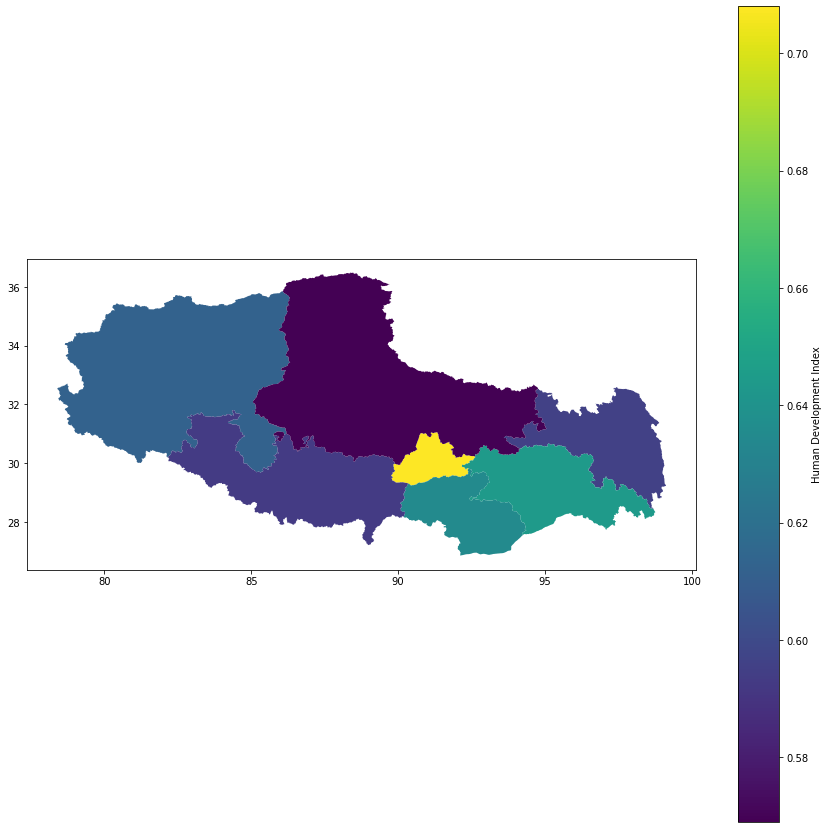

In [30]:
china_plot[china_plot['province name']=='西藏自治区'].plot('hdi', legend=True, figsize=(15, 15), legend_kwds={'label': "Human Development Index"})

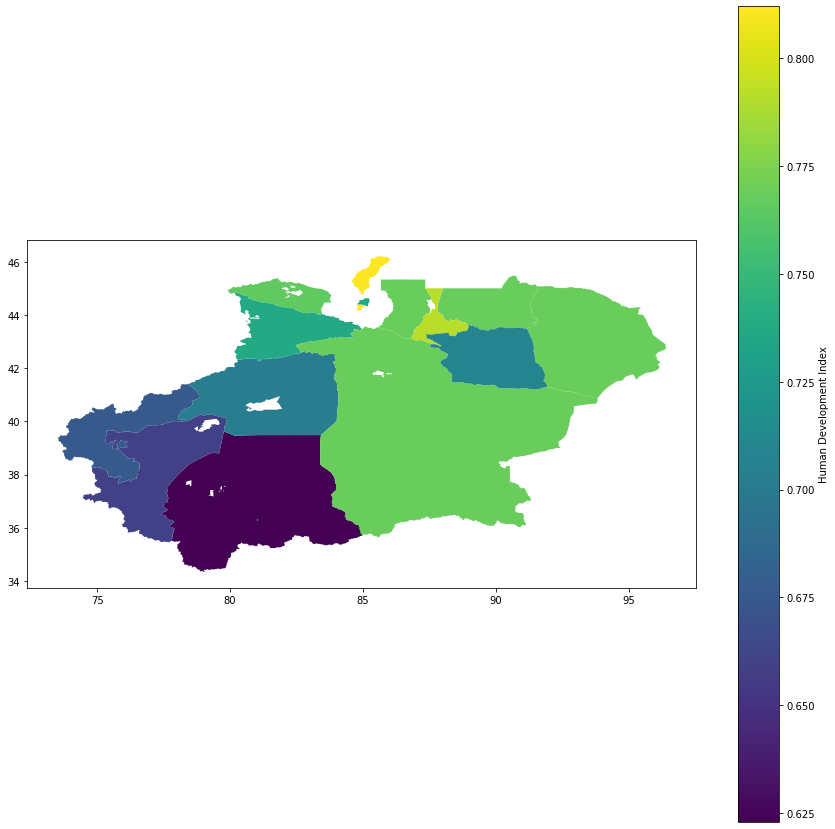

In [31]:
china_plot[china_plot['province name']=='新疆维吾尔自治区'].plot('hdi', legend=True, figsize=(15, 15), legend_kwds={'label': "Human Development Index"})

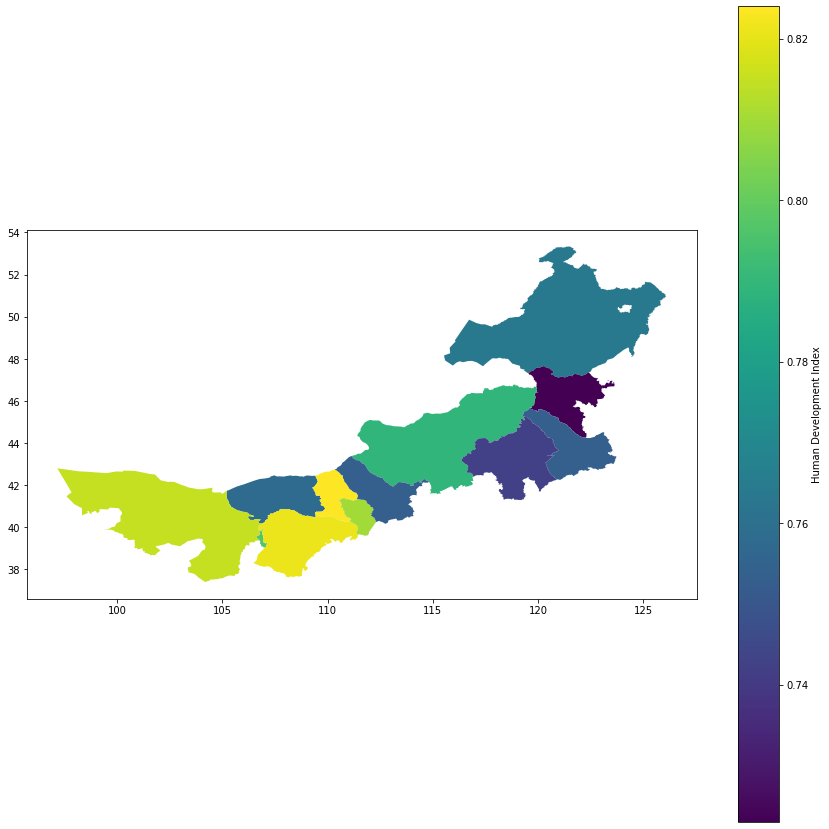

In [32]:
china_plot[china_plot['province name']=='内蒙古自治区'].plot('hdi', legend=True, figsize=(15, 15), legend_kwds={'label': "Human Development Index"})

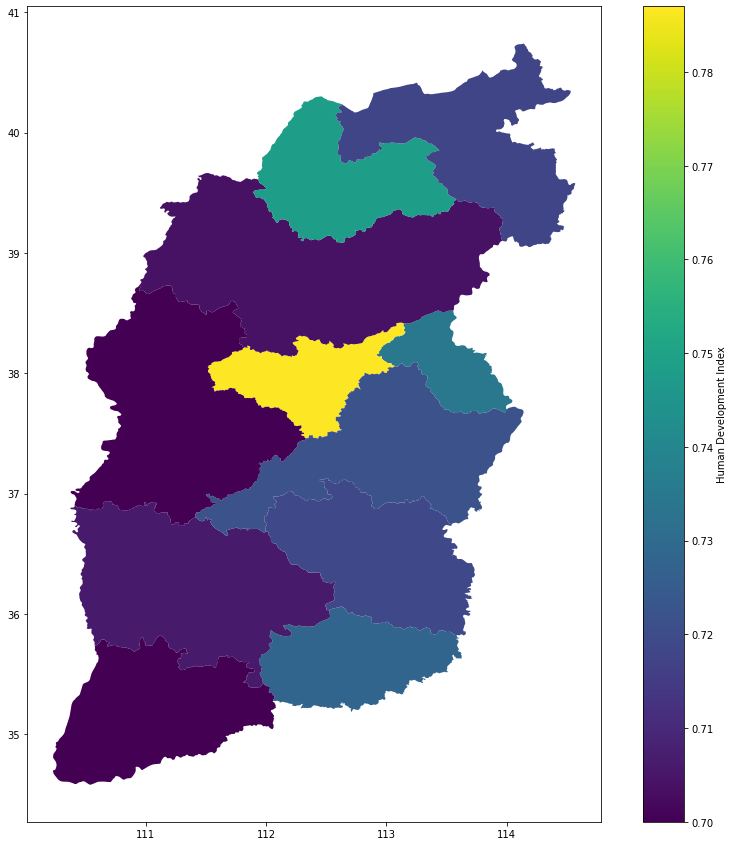

In [33]:
china_plot[china_plot['province name']=='山西省'].plot('hdi', legend=True, figsize=(15, 15), legend_kwds={'label': "Human Development Index"})

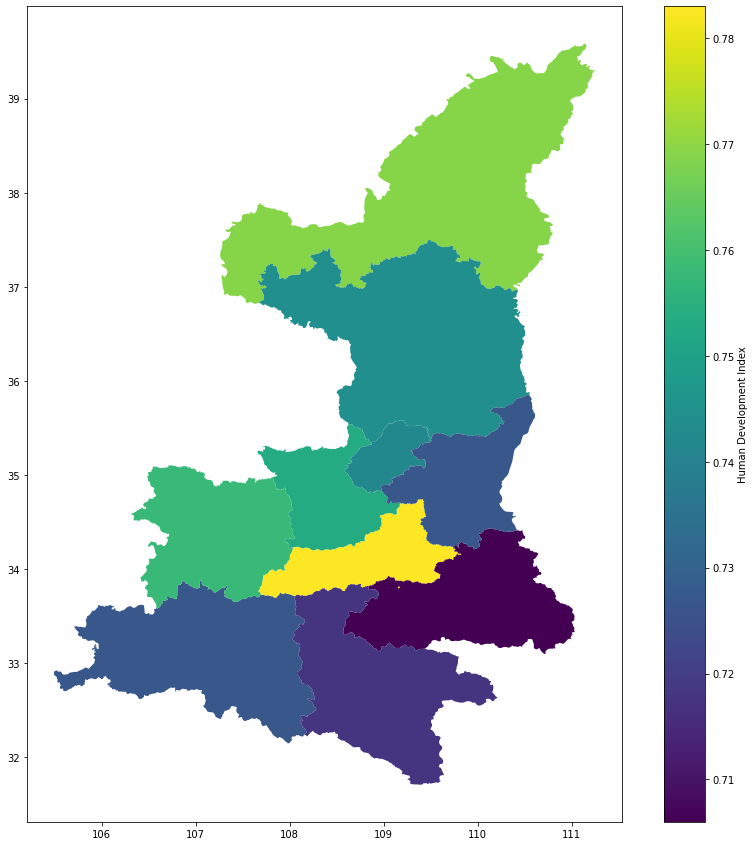

In [34]:
china_plot[china_plot['province name']=='陕西省'].plot('hdi', legend=True, figsize=(15, 15), legend_kwds={'label': "Human Development Index"})

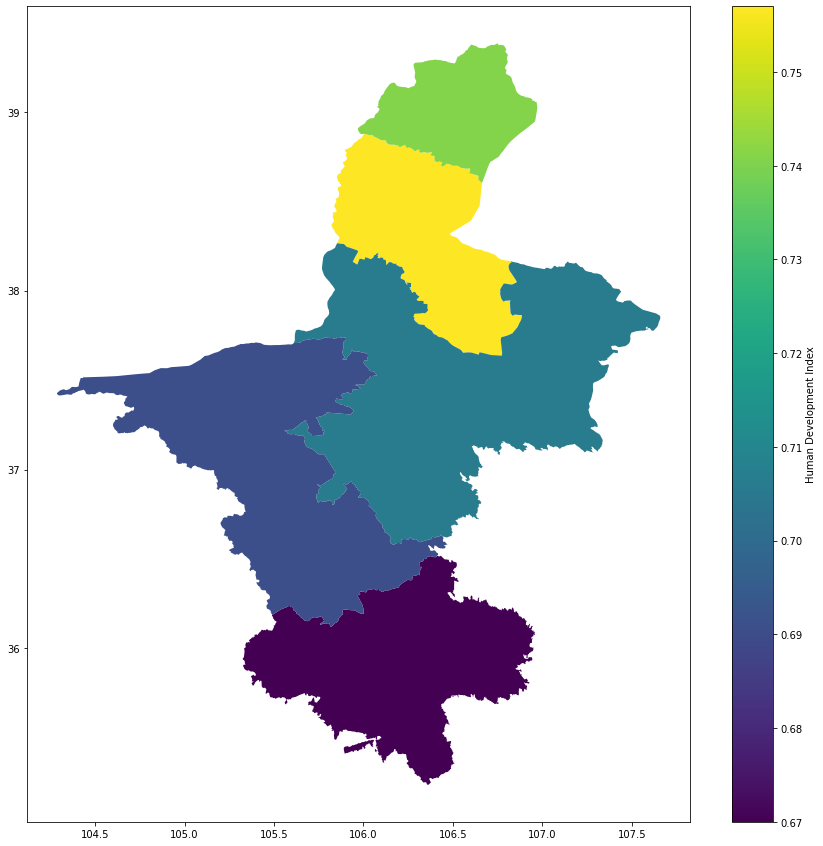

In [35]:
china_plot[china_plot['province name']=='宁夏回族自治区'].plot('hdi', legend=True, figsize=(15, 15), legend_kwds={'label': "Human Development Index"})

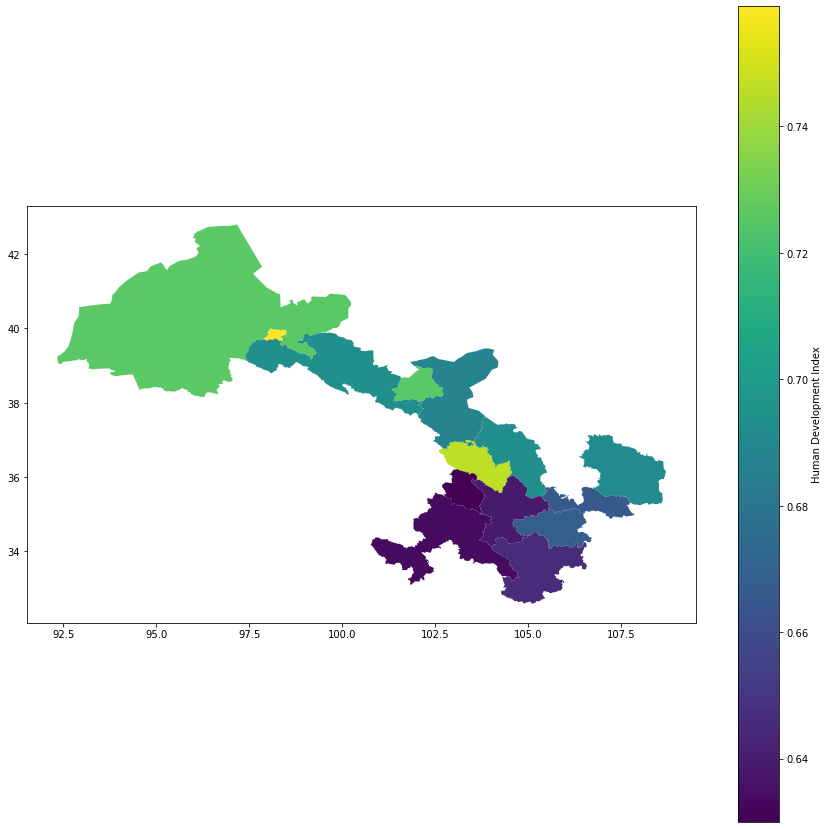

In [36]:
china_plot[china_plot['province name']=='甘肃省'].plot('hdi', legend=True, figsize=(15, 15), legend_kwds={'label': "Human Development Index"})

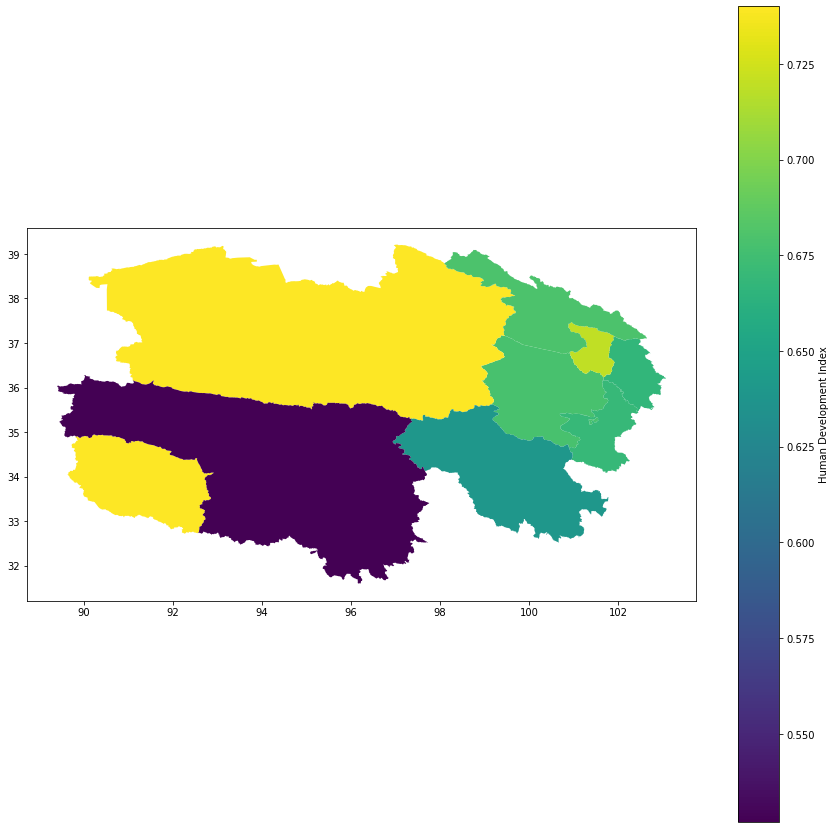

In [37]:
china_plot[china_plot['province name']=='青海省'].plot('hdi', legend=True, figsize=(15, 15), legend_kwds={'label': "Human Development Index"})

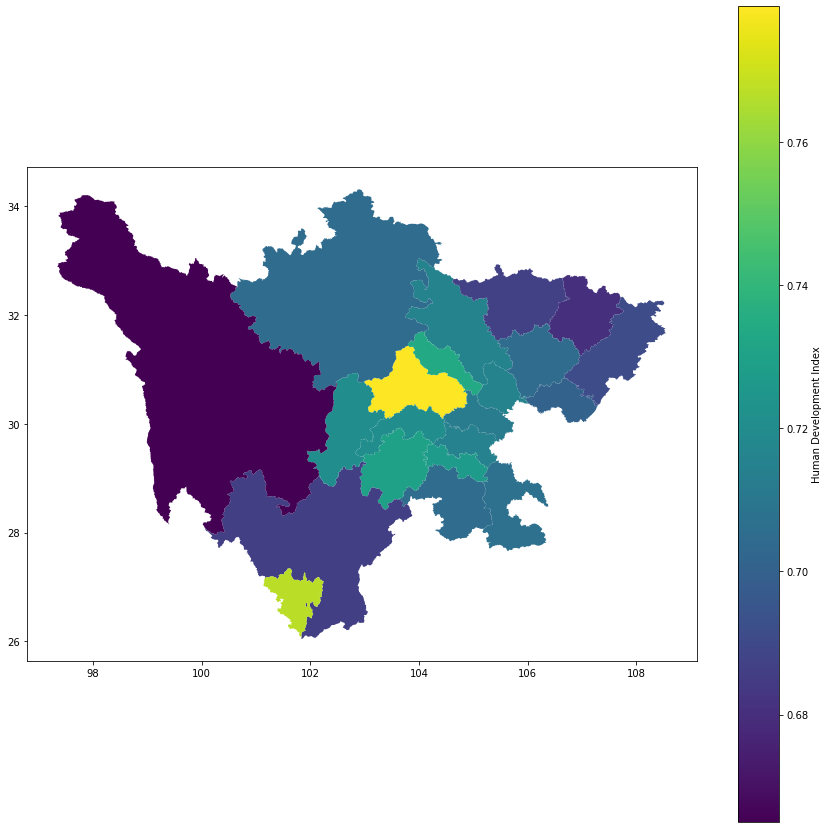

In [38]:
china_plot[china_plot['province name']=='四川省'].plot('hdi', legend=True, figsize=(15, 15), legend_kwds={'label': "Human Development Index"})

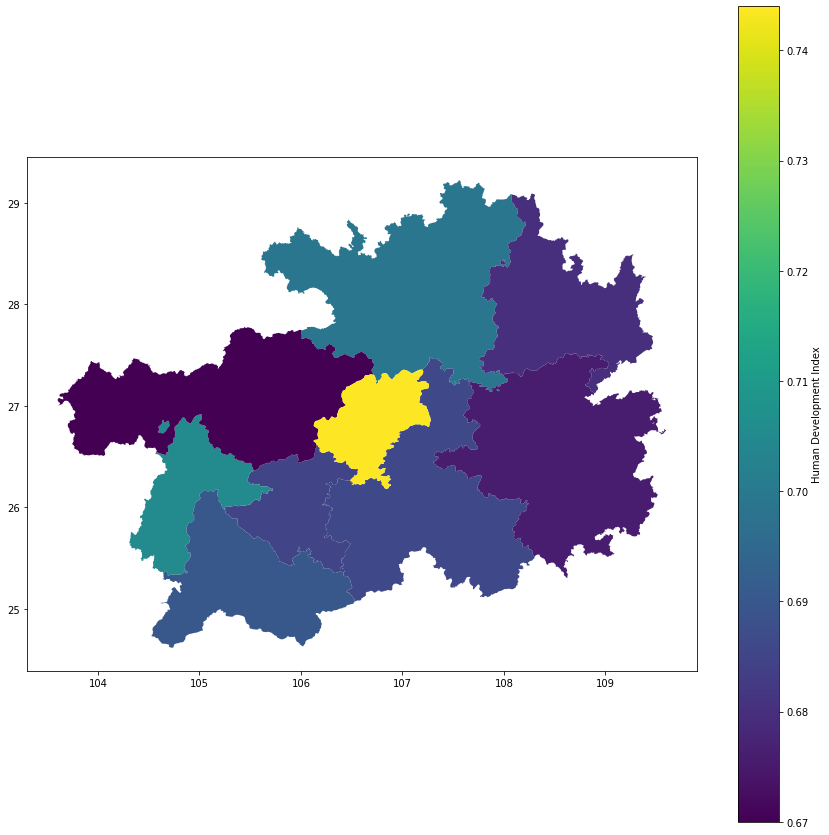

In [39]:
china_plot[china_plot['province name']=='贵州省'].plot('hdi', legend=True, figsize=(15, 15), legend_kwds={'label': "Human Development Index"})

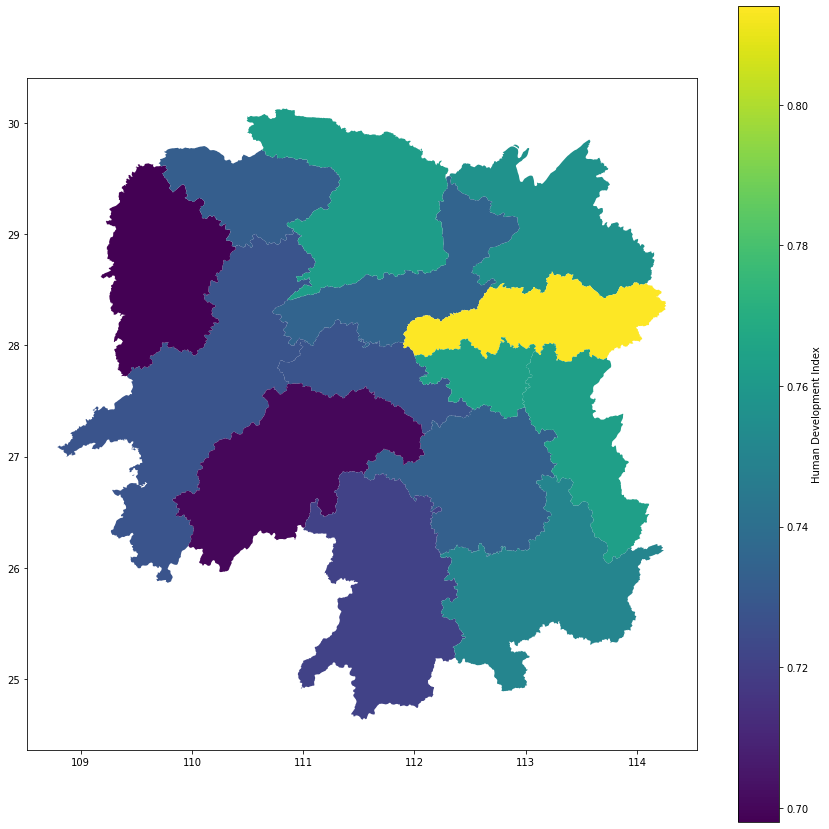

In [40]:
china_plot[china_plot['province name']=='湖南省'].plot('hdi', legend=True, figsize=(15, 15), legend_kwds={'label': "Human Development Index"})

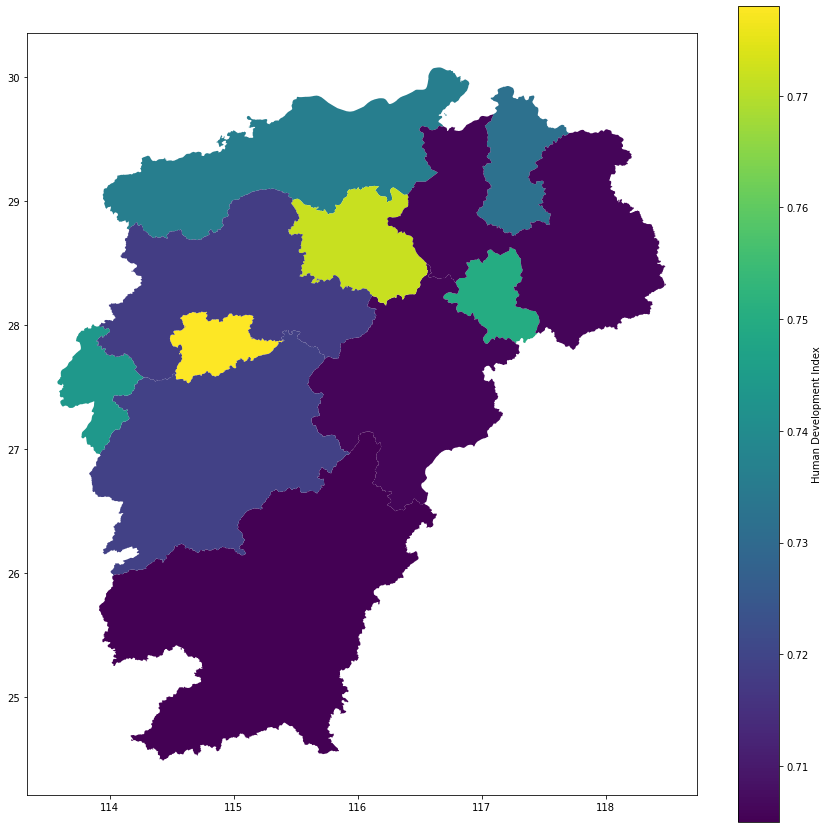

In [41]:
china_plot[china_plot['province name']=='江西省'].plot('hdi', legend=True, figsize=(15, 15), legend_kwds={'label': "Human Development Index"})

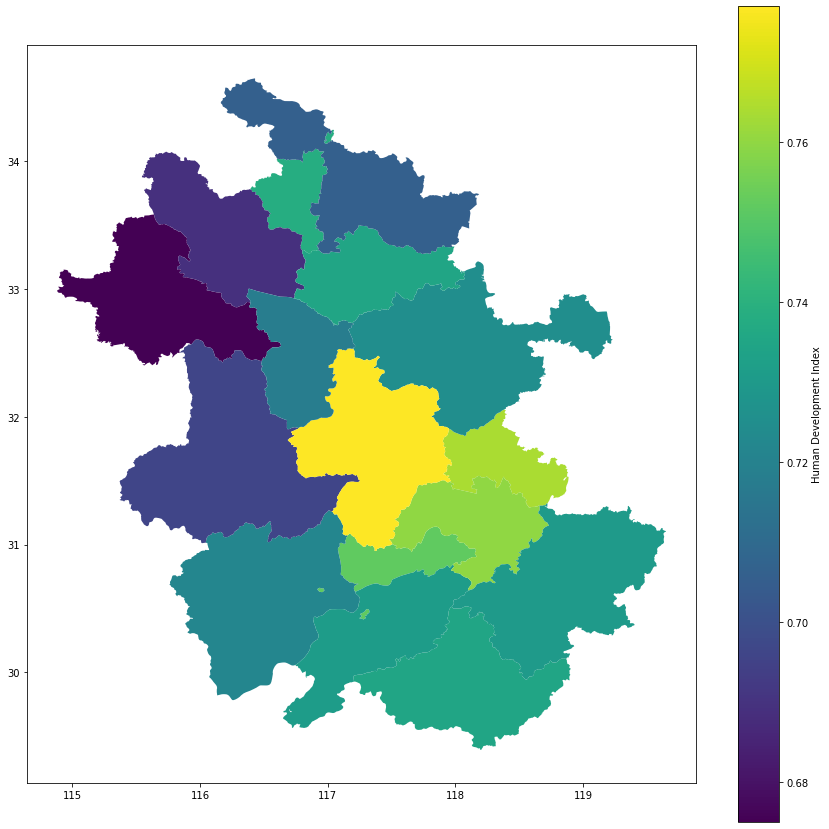

In [42]:
china_plot[china_plot['province name']=='安徽省'].plot('hdi', legend=True, figsize=(15, 15), legend_kwds={'label': "Human Development Index"})

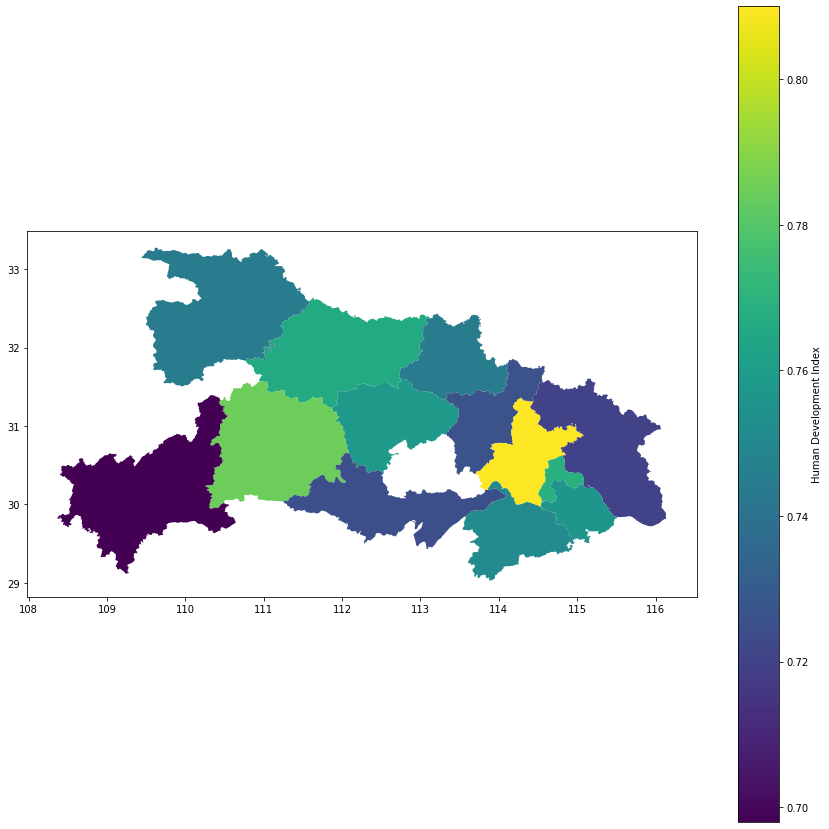

In [43]:
china_plot[china_plot['province name']=='湖北省'].plot('hdi', legend=True, figsize=(15, 15), legend_kwds={'label': "Human Development Index"})

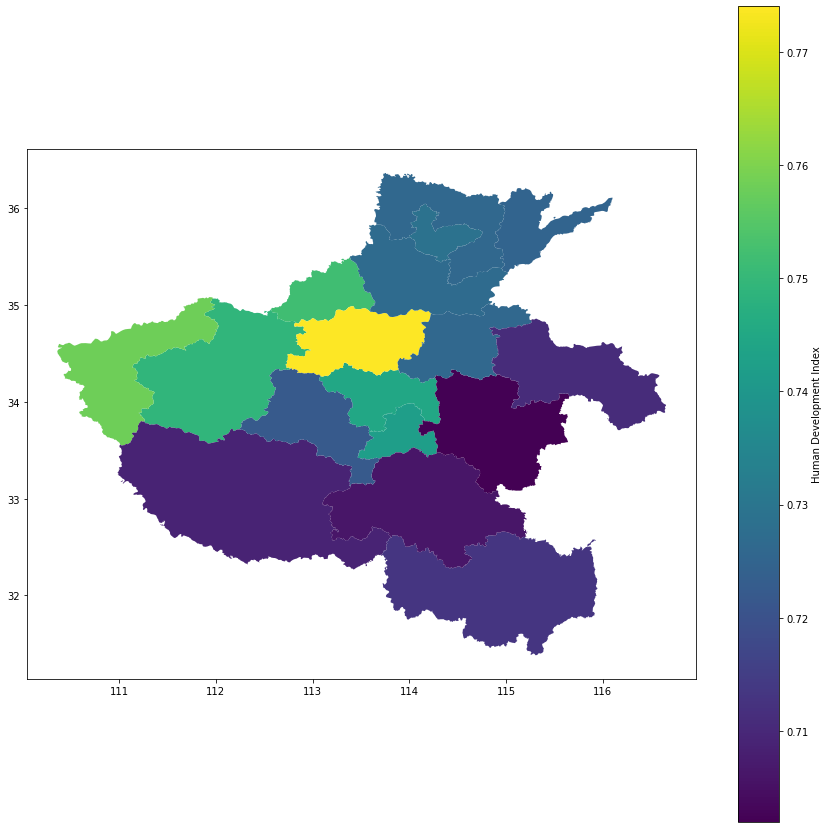

In [44]:
china_plot[china_plot['province name']=='河南省'].plot('hdi', legend=True, figsize=(15, 15), legend_kwds={'label': "Human Development Index"})